In [21]:
import pandas as pd
import matplotlib.pyplot as plt

Use pandas to read the csv file and then use the `head()` method to display the first 10 rows of the dataframe.


In [22]:
data = pd.read_csv("train.csv")
data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


Check for null values, data types of each column and some basic statistics of the dataframe.

In [23]:
# Read the CSV file
file_path = 'train.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

# Get summary statistics of the numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Check the data types of each column
print(df.dtypes)



                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
               toxic   severe_toxic        obscene         threat  \
count  159571.000000  159571.000000  159571.000000  159571.000000   
mean        0.095844       

Visualize the distribution of the labels using a bar chart.

Distribution of toxic labels:
toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64


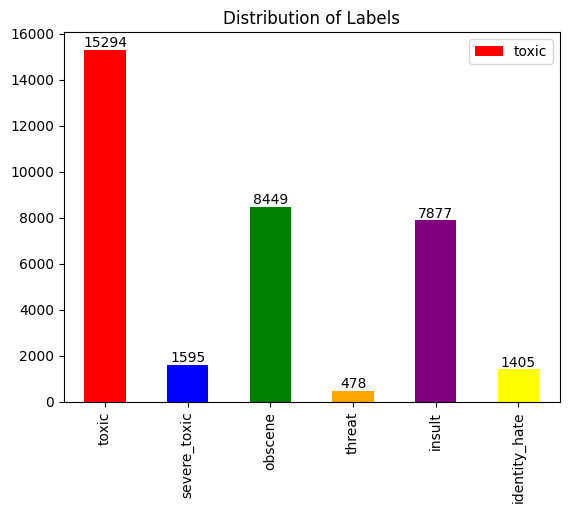

In [24]:
# Check the distribution of toxic labels
toxic_labels = ['toxic', 'severe_toxic',
                'obscene', 'threat', 'insult', 'identity_hate']
toxic_distribution = df[toxic_labels].sum()

print("Distribution of toxic labels:")
print(toxic_distribution)

# Assign colors to each label
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']

# Visualize the distribution of toxic labels
ax = toxic_distribution.plot(
    kind='bar', title='Distribution of Labels', color=colors)

# Add exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() /
                2, p.get_height()), ha='center', va='bottom')

# Add a legend
plt.legend(toxic_labels)

plt.show()

Since we would be doing single-label classificaton, we would visualize all toxic data versus the other label and cal them non-toxic.

Class Distribution:
toxic
0    144277
1     15294
Name: count, dtype: int64


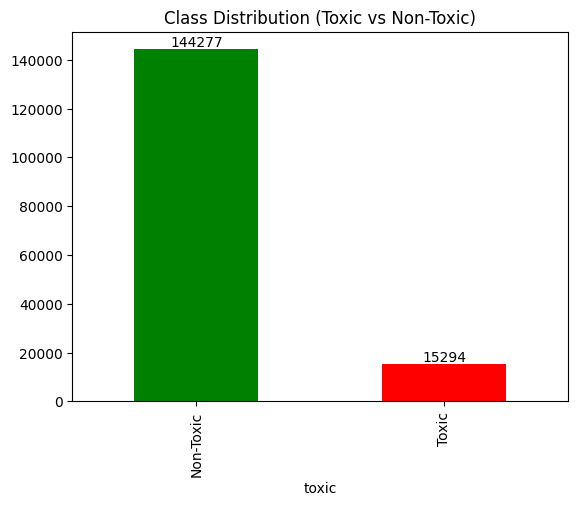

In [25]:
class_distribution = df['toxic'].value_counts()
print("Class Distribution:")
print(class_distribution)

# Assign labels and colors
labels = ['Non-Toxic', 'Toxic']
colors = ['green', 'red']

# Visualize the class distribution
ax = class_distribution.plot(
    kind='bar', title='Class Distribution (Toxic vs Non-Toxic)', color=colors)
ax.set_xticklabels(labels)  # Set x-axis labels

# Add exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

Drop the remaing colomns and keep only the toxic columns

In [26]:
toxic_data = data.drop(
    columns=['severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
toxic_data

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0
...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0
